A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# company_data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree

In [48]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1) (3).csv


In [49]:
data=pd.read_csv('Company_Data (1).csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [50]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [52]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [53]:
data.corr()

<ipython-input-53-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [54]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


converting sales column into categorical column

In [55]:
data['Sales']=data['Sales'].map(lambda x:1 if x>5 else 0)

In [56]:
data=pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,1,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,1,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,1,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,1,100,79,7,284,95,50,12,1,0,0,0,1,0,1


<Axes: >

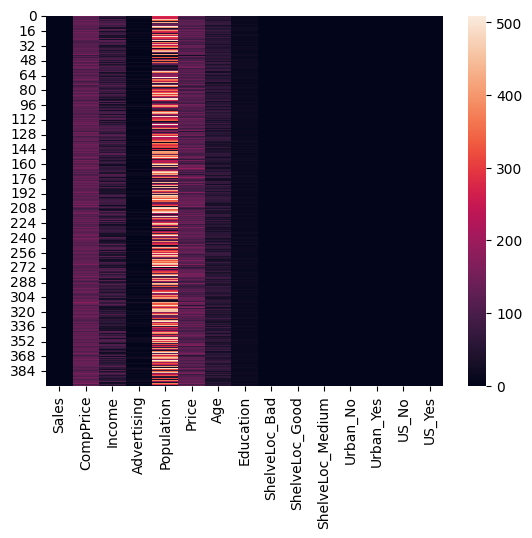

In [57]:
sns.heatmap(data)

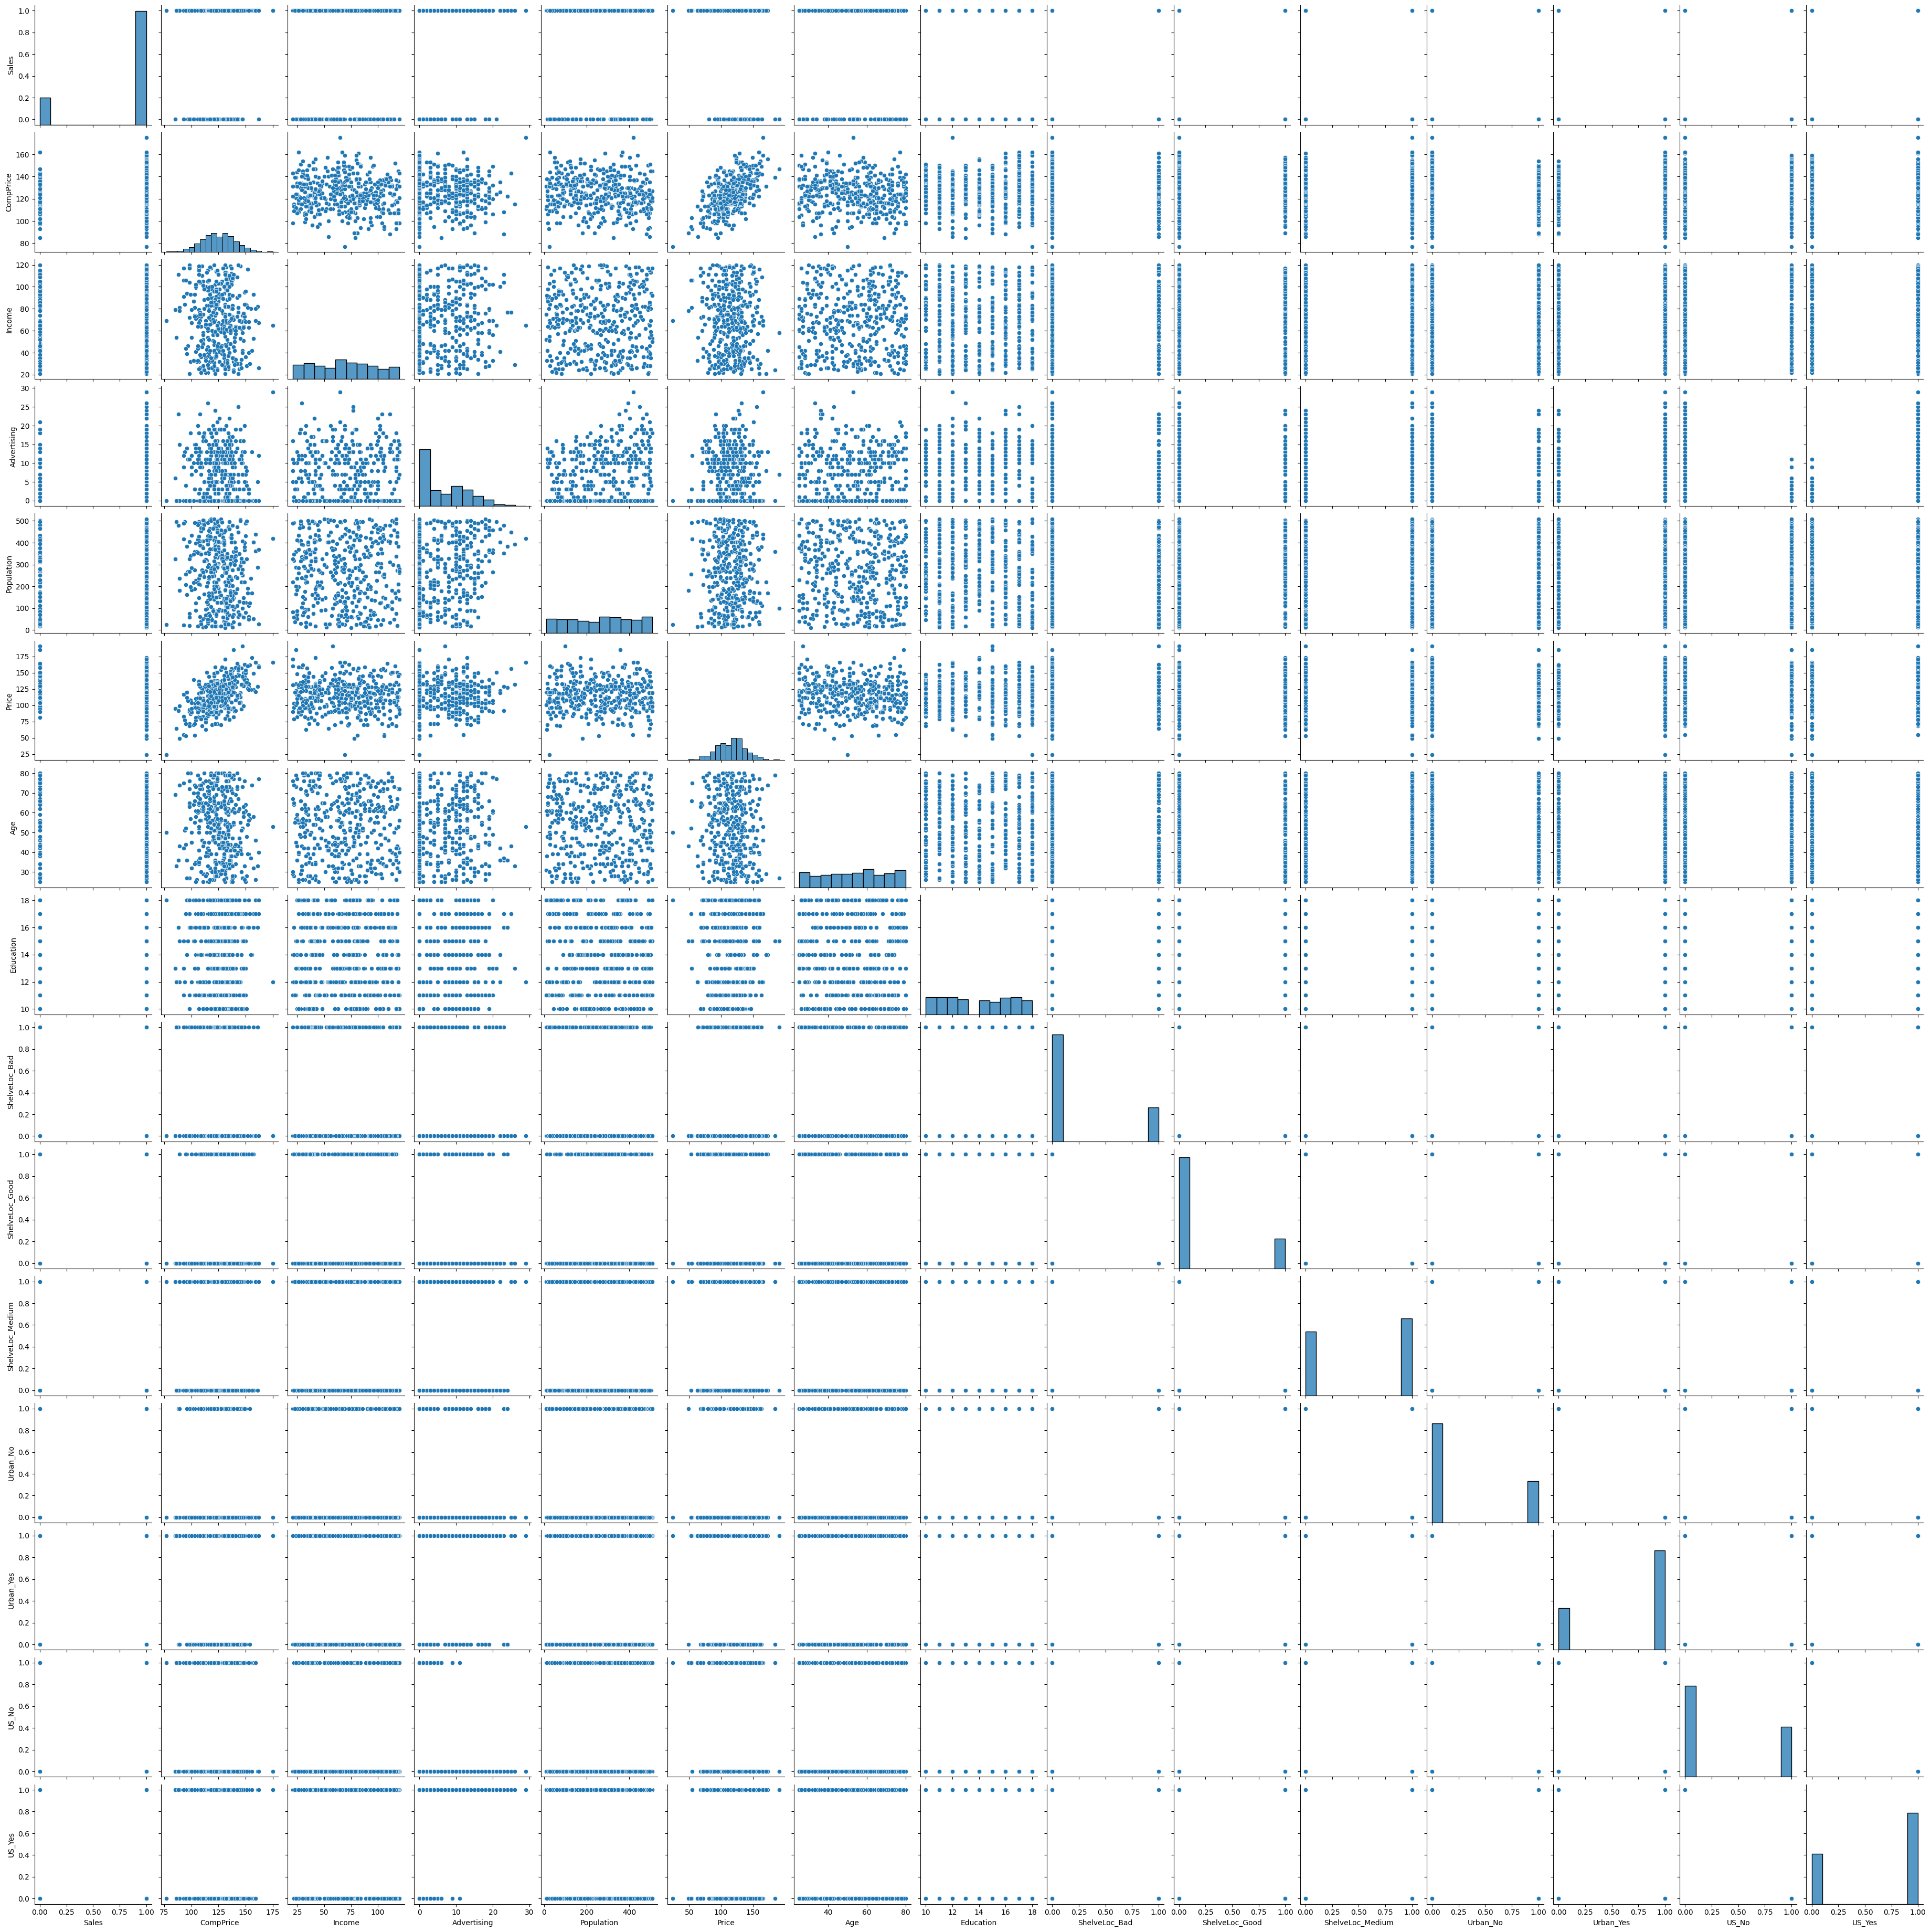

In [58]:
sns.pairplot(data)

In [59]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model

In [61]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [62]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.74\nsamples = 320\nvalue = [67, 253]'),
 Text(0.25, 0.625, 'x[4] <= 106.5\nentropy = 0.558\nsamples = 246\nvalue = [32, 214]'),
 Text(0.125, 0.375, 'x[0] <= 87.0\nentropy = 0.092\nsamples = 85\nvalue = [1, 84]'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 83\nvalue = [0, 83]'),
 Text(0.375, 0.375, 'x[5] <= 50.5\nentropy = 0.707\nsamples = 161\nvalue = [31, 130]'),
 Text(0.3125, 0.125, 'entropy = 0.319\nsamples = 69\nvalue = [4, 65]'),
 Text(0.4375, 0.125, 'entropy = 0.873\nsamples = 92\nvalue = [27, 65]'),
 Text(0.75, 0.625, 'x[4] <= 129.5\nentropy = 0.998\nsamples = 74\nvalue = [35, 39]'),
 Text(0.625, 0.375, 'x[5] <= 53.0\nentropy = 0.924\nsamples = 53\nvalue = [18, 35]'),
 Text(0.5625, 0.125, 'entropy = 0.426\nsamples = 23\nvalue = [2, 21]'),
 Text(0.6875, 0.125, 'entropy = 0.997\nsamples = 30\nvalue = [16, 14]'),
 Text(0.875, 0.375, 'x[5] <= 38.5\nentropy = 0.702\nsam

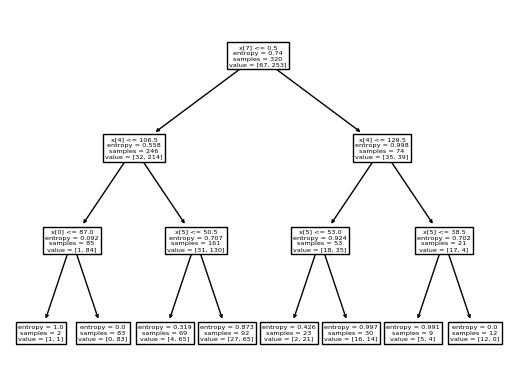

In [63]:
tree.plot_tree(model)

In [64]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
y_pred_df=pd.DataFrame({'actual':y_test,'predict':y_pred})
y_pred_df

,actual,predict
244,1,1
176,1,1
103,1,0
302,1,0
186,1,1
...,...,...
296,1,1
313,1,1
224,0,1
6,1,1


In [66]:
accuracy_score=accuracy_score(y_pred,y_test)
accuracy_score

0.7875

# GridSearchCV

In [67]:
model=DecisionTreeClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]})
grid

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

In [69]:
grid.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

In [70]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [71]:
grid.best_score_

0.82

# fraud check

Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [95]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (6).csv


In [96]:
data=pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [97]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [99]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [100]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

# performing EDA

converting the tax income to 0 and 1

In [101]:
data['Taxable.Income']=np.where(data['Taxable.Income']<= 30000, 0,1)
data


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [102]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<Axes: xlabel='Taxable.Income', ylabel='count'>

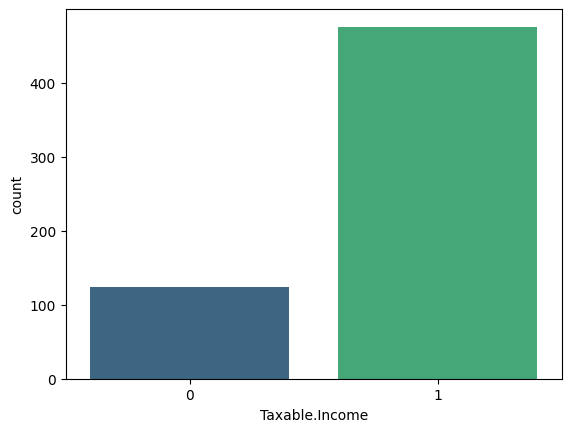

In [103]:
sns.countplot(x=data['Taxable.Income'],palette='viridis')

<Axes: >

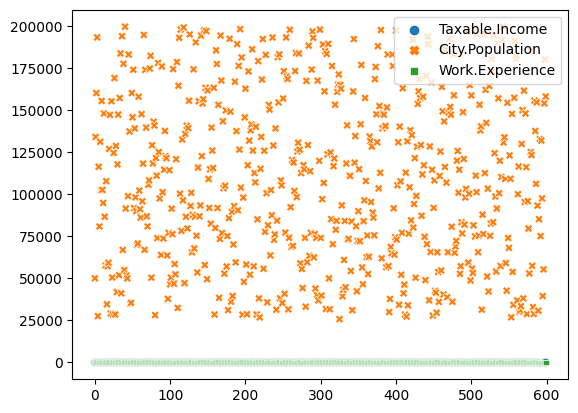

In [104]:
sns.scatterplot(data)

In [105]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,0,0,1
596,1,55369,2,0,1,1,0,0,0,1
597,1,154058,0,1,0,1,0,0,0,1
598,1,180083,17,0,1,0,1,0,1,0


<Axes: >

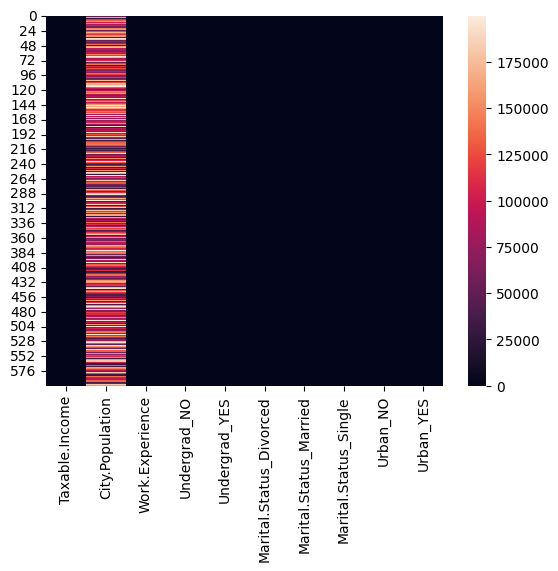

In [106]:
sns.heatmap(data)

<ipython-input-107-946844e4f3c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

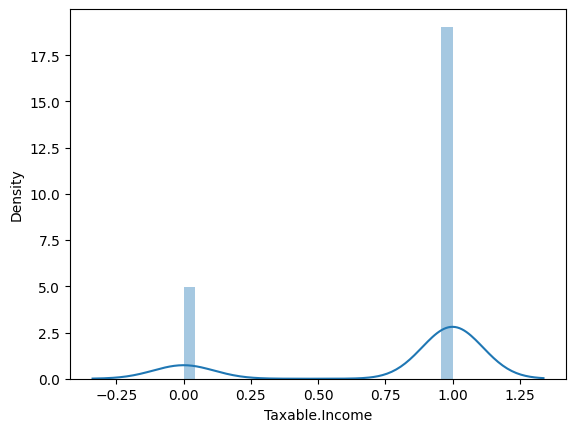

In [107]:
sns.distplot(data['Taxable.Income'])

In [108]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [110]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 0.696\nsamples = 480\nvalue = [90, 390]'),
 Text(0.25, 0.625, 'x[0] <= 37812.5\nentropy = 0.645\nsamples = 322\nvalue = [53, 269]'),
 Text(0.125, 0.375, 'x[0] <= 36098.5\nentropy = 0.932\nsamples = 23\nvalue = [8, 15]'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.375, 'x[0] <= 183724.5\nentropy = 0.611\nsamples = 299\nvalue = [45, 254]'),
 Text(0.3125, 0.125, 'entropy = 0.571\nsamples = 274\nvalue = [37, 237]'),
 Text(0.4375, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]'),
 Text(0.75, 0.625, 'x[0] <= 60077.5\nentropy = 0.785\nsamples = 158\nvalue = [37, 121]'),
 Text(0.625, 0.375, 'x[7] <= 0.5\nentropy = 0.398\nsamples = 38\nvalue = [3, 35]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6875, 0.125, 'entropy = 0.61\nsamples = 20\nvalue = [3, 17]'),
 Text(0.875, 0.375, 'x[0] <= 65532.0\nentro

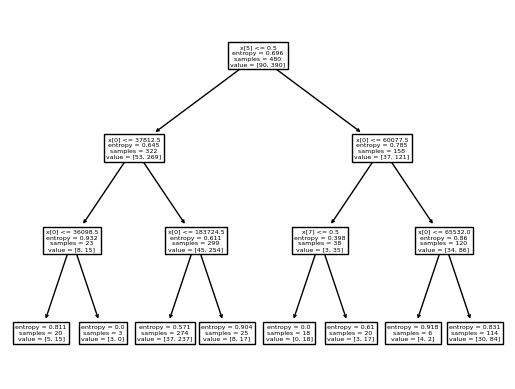

In [111]:
tree.plot_tree(model)

In [112]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [113]:
y_pred_df=pd.DataFrame({"actual":y_test,'predict':y_pred})
y_pred_df

,actual,predict
196,0,1
567,0,1
248,0,1
139,1,1
147,1,1
...,...,...
459,0,1
590,1,1
189,1,1
152,0,1


In [114]:
accuracy_entropy=accuracy_score(y_test,y_pred)
accuracy_entropy

0.7166666666666667

# Normalization

In [115]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x


In [116]:
data=norm_func(data)
data


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,1.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,1.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [117]:
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [119]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [120]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 0.817\nentropy = 0.718\nsamples = 480\nvalue = [95, 385]'),
 Text(0.25, 0.625, 'x[1] <= 0.217\nentropy = 0.757\nsamples = 371\nvalue = [81, 290]'),
 Text(0.125, 0.375, 'x[0] <= 0.864\nentropy = 0.615\nsamples = 92\nvalue = [14, 78]'),
 Text(0.0625, 0.125, 'entropy = 0.523\nsamples = 85\nvalue = [10, 75]'),
 Text(0.1875, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.375, 'x[1] <= 0.25\nentropy = 0.795\nsamples = 279\nvalue = [67, 212]'),
 Text(0.3125, 0.125, 'entropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.4375, 0.125, 'entropy = 0.773\nsamples = 260\nvalue = [59, 201]'),
 Text(0.75, 0.625, 'x[1] <= 0.983\nentropy = 0.553\nsamples = 109\nvalue = [14, 95]'),
 Text(0.625, 0.375, 'x[5] <= 0.5\nentropy = 0.436\nsamples = 89\nvalue = [8, 81]'),
 Text(0.5625, 0.125, 'entropy = 0.127\nsamples = 57\nvalue = [1, 56]'),
 Text(0.6875, 0.125, 'entropy = 0.758\nsamples = 32\nvalue = [7, 25]'),
 Text(0.875, 0.375, 'x[5] <= 0.5\nentropy = 0

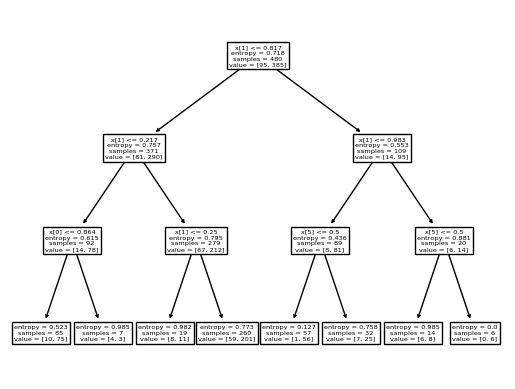

In [121]:
tree.plot_tree(model)

In [122]:
y_pred=model.predict(x_test)
y_pred


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1.])

In [123]:
y_pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
y_pred_df


,Actual,Predicted
44,1.0,1.0
237,0.0,1.0
123,0.0,1.0
293,1.0,1.0
540,0.0,1.0
...,...,...
18,1.0,1.0
143,0.0,1.0
590,1.0,1.0
535,1.0,0.0


In [124]:
entropy_accuracy_norm=accuracy_score(y_test,y_pred)
entropy_accuracy_norm

0.7083333333333334

In [125]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.7583333333333333